Problem 2: Binary Classification - You are given an artificially generated ’half-moon’ dataset for binary classification (N = 200), halfmoon.csv

Problem 2a: Plot the inputs in a 2D plot. Use color to indicate when the output is +1 and −1. You will see that this dataset is not linearly separate.

           X1        X2    Y
0   -0.879265  0.305631  0.0
1    0.221074  0.261206  1.0
2   -0.142620  1.005713  0.0
3    1.050584  0.401383  0.0
4    0.289815  0.858672  0.0
..        ...       ...  ...
195 -0.760649 -0.186323  0.0
196  0.585966  0.763316  0.0
197 -0.960386  0.698759  0.0
198  1.947317  0.371906  1.0
199  1.660784 -0.178296  1.0

[200 rows x 3 columns]


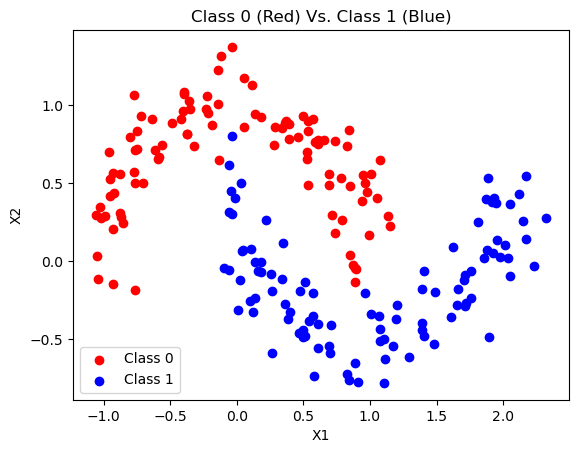

In [3]:
# Libraries to import - Pandas for reading csv, matplotlib for plotting, numpy for basic math
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Path to file on personal machine. Please change path for your own machine to read in data
Path_to_Half_Moon_Data = '/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset/halfmoon.csv'

# Load the data from the csv file and reset the index to make the data readable.
Half_Moon_Data = pd.read_csv(Path_to_Half_Moon_Data)
Half_Moon_Data.drop(Half_Moon_Data.columns[0], axis=1, inplace=True)

print(Half_Moon_Data)

# Seperate the data based on the classes. I'm not sure if theres a fault in the data set or the problem 
# but the class in the data set are 0 and 1 while the problem states 1 and -1.
Class_0_Data = Half_Moon_Data[Half_Moon_Data['Y'] == 0]
Class_1_Data = Half_Moon_Data[Half_Moon_Data['Y'] == 1]

# Scatter plot the data
plt.scatter(Class_0_Data['X1'], Class_0_Data['X2'], c = 'Red')
plt.scatter(Class_1_Data['X1'], Class_1_Data['X2'], c = 'Blue')

# Label the plot
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['Class 0', 'Class 1'], loc = 'lower left')

# Plot Title
plt.title('Class 0 (Red) Vs. Class 1 (Blue)')

# Show the plot
plt.show()

Problem 2b: Code the the perceptron algorithm on this data. Does the algorithm converge?

Comments: After passing the data set through the perceptron algorithm, it is clear that the perceptron does not converge. The target function was not even close to creating a linearly seperable dataset. The data set also took 109 convergence updates and failed to find weight values that would produce a target function that would be even close to seperating the data.

Total Convergence Steps: 109 steps


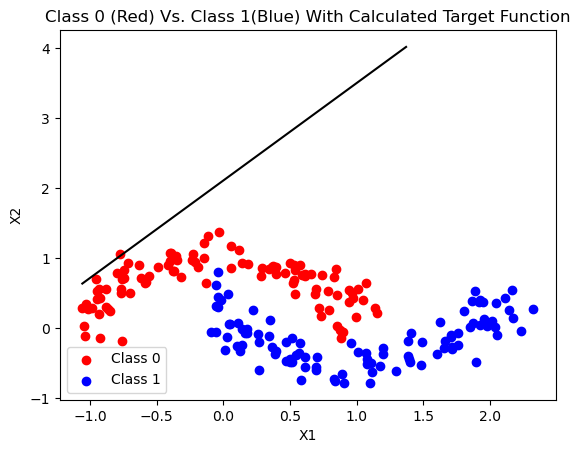

In [5]:
# Create weight list for the data set
Weight_List, New_Weight_List = np.zeros(3), np.zeros(3)

# Find the length of the data set
Sample_Data_Length = len(Half_Moon_Data)

# Create a list to store the output predictions for each data point
Y_Output_Prediction = np.zeros(Sample_Data_Length)

# Set the training/alpha value
Alpha = 0.1

# Create a convergence variable to store the number of updates across the entire set
Convergence = 0

# Loop through the entire data set
for i in range(Sample_Data_Length):

    # Create a feature list with the feature values for the specific data point
    Feature_List = [1, Half_Moon_Data['X1'][i], Half_Moon_Data['X2'][i]]
    
    # Find the prediction value for the data point
    Y_Output_Prediction[i] = np.sign(np.dot(Weight_List, Feature_List))  

    # Update weights using equation (w+1) <-- w(t) + Alpha * (yi - y_i_hat) * Xi
    
    # Adjust the weight values by finding the difference of the guess and actual data label
    # and multiply by the difference by the learning rate Alpha
    Constant_Multiplier = Alpha * (Half_Moon_Data['Y'][i] - Y_Output_Prediction[i])
    Weight_Modifier = [Constant_Multiplier * Feature for Feature in Feature_List]
    
    # Apply the weight adjustment to each weight in the list
    for j in range(len(Weight_List)):
        New_Weight_List[j] = Weight_List[j] + Weight_Modifier[j]
    
    # Compare the original weight value to the new weight values
    Weight_Comparison = Weight_List == New_Weight_List
    Identical_Weight_Check = Weight_Comparison.all()

    #print(Weight_List, New_Weight_List, Identical_Weight_Check)
    
    # If the new and orignal weights are not identical, reset the new weight list
    # and update the convergence counter
    if not Identical_Weight_Check:
        Weight_List = New_Weight_List
        New_Weight_List = np.zeros(3)
        Convergence += 1
        
print('Total Convergence Steps: ' + str(Convergence) + ' steps')

# Bisect the data into class 0 and class 1 lists
Class_0_Data = Half_Moon_Data[Half_Moon_Data['Y'] == 0]
Class_1_Data = Half_Moon_Data[Half_Moon_Data['Y'] == 1]

# Scatter plot the two classes of data
plt.scatter(Class_0_Data['X1'], Class_0_Data['X2'], c = 'Red')
plt.scatter(Class_1_Data['X1'], Class_1_Data['X2'], c = 'Blue')

# Label the axis of the scatter plot
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend(['Class 0', 'Class 1'], loc = 'lower left')
plt.title('Class 0 (Red) Vs. Class 1(Blue) With Calculated Target Function')

# Find the domain for the target function
x1_min = min(Half_Moon_Data['X1'])
x1_max = max(Half_Moon_Data['X2'])
x1 = np.linspace(x1_min, x1_max, Sample_Data_Length)

# Calculate the target function
x2 = (-Weight_List[1] / Weight_List[2]) * x1 - (Weight_List[0] / Weight_List[2])

# Plot the target function
plt.plot(x1,x2, color = 'black')

plt.show()


Problem 2c: Adapt the perceptron algorithm to a nonlinear classifier and use it on the given dataset. Partition the data into 80% training set and 20% test set. What is Etrain? What is the test error Etest? Which one is bigger? What did you expect?

Comments:

After splitting the data set and evaluating the data in both the training and test sets, I found the training error to be 14.04% and the testing error to be 19%. The testing error is bigger by 5%. This is to be expected since we shrank the size of the training set causing the weights to not be adjusted as fine as they could be for the test set.

In [11]:
# Find the length of the Half_Moon data set
Sample_Data_Length = len(Half_Moon_Data)

# Create an index list for the training and testing set that will store which indexes
# to pull data from the original data set.
Training_Data_Index = []
Testing_Data_Index = []

# Iterate over the entire data set
for i in range(Sample_Data_Length):
    # If the index is less than 80% of the dataset, then store the indexes into the testing data index
    # so when we pull values from the original dataset, the testing data will avoid the stored indexes.
    if i < Sample_Data_Length * 0.8:
        Testing_Data_Index.append(i)
    else:
        Training_Data_Index.append(i)

# Pull training data from the Half_Moon data set based on the indexes to avoid in training_data_index
Training_Data = Half_Moon_Data
Training_Data = Training_Data.drop(Training_Data_Index)

# Pull training data from the Half_Moon data set based on the indexes to avoid in testing_data_index
Testing_Data = Half_Moon_Data
Testing_Data = Testing_Data.drop(Testing_Data_Index)

# Reset the index of the testing data set or else the index will start at 180 instead of 1.
Testing_Data.reset_index(drop=True, inplace=True)

# ----- Evaluating the Training Set ------ #

# Create a weight list to store the weight values for the perceptron algorithm
Weight_List, New_Weight_List = np.zeros(3), np.zeros(3)

# Create a list to store the prediction values for each data point
Y_Output_Prediction = np.zeros(len(Training_Data))

# Set the training/alpha value
Alpha = 0.1

# Set the bias value
b = 0.5

# Training error
E_Train = 0

# Loop through the entire training data set
for i in range(len(Training_Data)):

    # Create a feature list for the training data
    Feature_List = [1, Training_Data['X1'][i], Training_Data['X2'][i]]
    
    # Use the sigmoid activation function to convert the original perceptron to a non linear
    # activation function
    Y_Output_Prediction[i] = 1 / (1 + np.exp((np.dot(Weight_List, Feature_List) + b))) 
    
    # Find the constant and multiplier values to update the weights for the perceptron
    Constant_Multiplier = Alpha * (Training_Data['Y'][i] + Y_Output_Prediction[i])
    Weight_Modifier = [Constant_Multiplier * Feature for Feature in Feature_List]
    
    # Update each weight in the weight list
    for j in range(len(Weight_List)):
        New_Weight_List[j] = Weight_List[j] - Weight_Modifier[j]

    # Compare the original weights to the new weights to see if the function
    # is converging and track the convergence updates
    Weight_Comparison = Weight_List == New_Weight_List
    Identical_Weight_Check = Weight_Comparison.all()

    # If the new and original weights are not identical, update the convergence tracker
    # and reset the new weight list
    if not Identical_Weight_Check:
        Weight_List = New_Weight_List
        New_Weight_List = np.zeros(3)
        Convergence += 1

# Calculate the training error based on the mean squared error function
for i in range(len(Testing_Data)):
    E_Train = (E_Train + np.square(Y_Output_Prediction[i] - (Training_Data['Y'][i])))
        
print('Training Error: ' + str(E_Train))

# ----- Evaluating the Testing Set ------ #

# For the test set, we don't need to initialize new weight values since were pulling the
# weights from the training set

# Create a new list to store the prediction values
Y_Output_Prediction = np.zeros(len(Testing_Data))

# Initialize the testing error
E_Test = 0

# Loop over the entire test set
for i in range(len(Testing_Data)):
    
    # Create a feature list for each data point in the test set
    Feature_List = [1, Testing_Data['X1'][i], Testing_Data['X2'][i]]
    
    # Calculate the prediction of the data points class using the sigmoid function
    Y_Output_Prediction[i] = 1 / (1 + np.exp((np.dot(Weight_List, Feature_List) + b))) 
    
    # Find the constant and multiplier values to update the weights for the perceptron
    Constant_Multiplier = Alpha * (Testing_Data['Y'][i] + Y_Output_Prediction[i])
    Weight_Modifier = [Constant_Multiplier * Feature for Feature in Feature_List]
    
    # Reassign the new weight values to the new weight list
    for j in range(len(Weight_List)):
        New_Weight_List[j] = Weight_List[j] - Weight_Modifier[j]
    
    # Compare the new weight values to the original weight values
    Weight_Comparison = Weight_List == New_Weight_List
    Identical_Weight_Check = Weight_Comparison.all()
    
    # If the original and new weights are not identical, reset the weight values
    # and update the convergence update tracker
    if not Identical_Weight_Check:
        Weight_List = New_Weight_List
        New_Weight_List = np.zeros(3)
        Convergence += 1

# Calculate the testing error for the test data set
for i in range(len(Testing_Data)):
    E_Test = E_Test + np.square( Y_Output_Prediction[i] - (Testing_Data['Y'][i]))
    
print('Testing Error: ' + str(E_Test))

Training Error: 14.046838498593473
Testing Error: 17.99992286014139


Problem 1d: Repeat part c) using logistic regression (you can use an existing function).

Comments:

Using the logistic function from the sklearn library, the training error was found to be 10% while the testing error was 15%.

In [33]:
# Imported library to split the data
from sklearn.model_selection import train_test_split
import numpy as np

# Path to file on personal machine. Please change path for your own machine to read in data
Path_to_Half_Moon_Data = '/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset/halfmoon.csv'

# Load the data from the csv file
Half_Moon_Data = pd.read_csv(Path_to_Half_Moon_Data)

# Split the data set based on the features and the class output
X = Half_Moon_Data.iloc[:,:-1].values
y = Half_Moon_Data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [35]:
# Imported library to perform logistic regression and evaluate the performance
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 

# Call the logistic regression function
logreg = LogisticRegression(solver='liblinear')

# Fit the data to the model
logreg.fit(X_train, y_train)

# Predict and store the values from the model
y_pred = logreg.predict(X_test)

# Calculate the training and testing error
print('Training Error: ' + str(1 - logreg.fit(X_train, y_train).score(X_train, y_train)))
print('Testing Error: ' + str(1 - metrics.accuracy_score(y_test, y_pred)))

Training Error: 0.09999999999999998
Testing Error: 0.15000000000000002


Problem 1e: Repeat part c) using k-Nearest Neighbor (you can use an existing function).

Comments:

Using the k-Nearest Neighbor function from the sklearn library, the training error was found to be 22% while the testing error was 42.5%.

In [38]:
# Imported library to split the data
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Path to file on personal machine. Please change path for your own machine to read in data
Path_to_Half_Moon_Data = '/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset/halfmoon.csv'

# Load the data from the csv file
Half_Moon_Data = pd.read_csv(Path_to_Half_Moon_Data)

# Split the data set based on the features and the class output
X = Half_Moon_Data.iloc[:,:-1].values
y = Half_Moon_Data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Call the K neighbor classifier function
KNC = KNeighborsClassifier(n_neighbors=5)

# Fit the data to the model
KNC.fit(X_train, y_train)

# Predict and store the values from the model
y_pred = KNC.predict(X_test)

# Calculate the training and testing error
print('Training Error: ' + str(1 - KNC.fit(X_train, y_train).score(X_train, y_train)))
print('Testing Error: ' + str(1 - metrics.accuracy_score(y_test, y_pred)))

Training Error: 0.21875
Testing Error: 0.42500000000000004


Problem 1f: Repeat part c) using decision tree (you can use an existing function).
    
Comments:

Using the decision tree function from the sklearn library, the training error was found to be 21.9% while the testing error was 2.5%.


In [39]:
# Imported library to split the data
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

# Path to file on personal machine. Please change path for your own machine to read in data
Path_to_Half_Moon_Data = '/Users/spencerkerkau/Desktop/EE 445 HW1 Dataset/halfmoon.csv'

# Load the data from the csv file
Half_Moon_Data = pd.read_csv(Path_to_Half_Moon_Data)

# Split the data set based on the features and the class output
X = Half_Moon_Data.iloc[:,:-1].values
y = Half_Moon_Data.iloc[:,-1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# Call the decision tree classifier function
DTC = DecisionTreeClassifier(random_state=0)

# Fit the data to the model
DTC.fit(X_train, y_train)

# Predict and store the values from the model
y_pred = DTC.predict(X_test)

# Calculate the training and testing error
print('Training Error: ' + str(1 - KNC.fit(X_train, y_train).score(X_train, y_train)))
print('Testing Error: ' + str(1 - metrics.accuracy_score(y_test, y_pred)))

Training Error: 0.21875
Testing Error: 0.025000000000000022
